## Importing Dependencies

In [3]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

plt.style.use('fivethirtyeight')

## Data Cleaning

In [4]:
# importing raw file

df1=pd.read_excel('Raw Data - v5.xlsx',sheet_name='Data')
df1.head()

,Month,Location,Rent,Apartment Type,Distance from University (miles),Public Transportation Rank,Private Transportation Rank,Inflation,t_month
0,2000-01-31,Branford,0.0,1 Bedroom,16.0,10,11,2.7,1
1,2000-02-29,Branford,0.0,1 Bedroom,16.0,10,11,3.2,2
2,2000-03-31,Branford,0.0,1 Bedroom,16.0,10,11,3.8,3
3,2000-04-30,Branford,0.0,1 Bedroom,16.0,10,11,3.1,4
4,2000-05-31,Branford,0.0,1 Bedroom,16.0,10,11,3.2,5


In [5]:
# Converting zeroes in rent column to NAN since the rent column can never be zero

cols = ["Rent"]
df1[cols] = df1[cols].replace({'0':np.nan, 0:np.nan})
df1.head()

,Month,Location,Rent,Apartment Type,Distance from University (miles),Public Transportation Rank,Private Transportation Rank,Inflation,t_month
0,2000-01-31,Branford,NaN,1 Bedroom,16.0,10,11,2.7,1
1,2000-02-29,Branford,NaN,1 Bedroom,16.0,10,11,3.2,2
2,2000-03-31,Branford,NaN,1 Bedroom,16.0,10,11,3.8,3
3,2000-04-30,Branford,NaN,1 Bedroom,16.0,10,11,3.1,4
4,2000-05-31,Branford,NaN,1 Bedroom,16.0,10,11,3.2,5


In [6]:
df1.shape

(18018, 9)

In [7]:
# Checking null values and datatypes in the dataset

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18018 entries, 0 to 18017
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Month                             18018 non-null  datetime64[ns]
 1   Location                          18018 non-null  object        
 2   Rent                              14804 non-null  float64       
 3   Apartment Type                    18018 non-null  object        
 4   Distance from University (miles)  18018 non-null  float64       
 5   Public Transportation Rank        18018 non-null  int64         
 6   Private Transportation Rank       18018 non-null  int64         
 7   Inflation                         18018 non-null  float64       
 8   t_month                           18018 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 1.2+ MB


In [8]:
df1.isna().sum()

Month                                  0
Location                               0
Rent                                3214
Apartment Type                         0
Distance from University (miles)       0
Public Transportation Rank             0
Private Transportation Rank            0
Inflation                              0
t_month                                0
dtype: int64

##### *Observation1: Rent column has 3214 null values*

In [9]:
# Removing null values from the dataset

df1.dropna(inplace=True)
df1.shape

(14804, 9)

In [10]:
# Unique values in the apartment type

df1['Apartment Type'].unique()

array(['1 Bedroom', '2 Bedroom', 'Condo', '3 Bedroom', '5 Bedroom',
       '4 Bedroom'], dtype=object)

#### *Observation2: Removing condos from the apartment type*

In [11]:
# Considering only 1 to 5 bhk apartment

df2=df1[df1['Apartment Type']!='Condo']
print(df2.shape)
df2['Apartment Type'].unique()

(12261, 9)


array(['1 Bedroom', '2 Bedroom', '3 Bedroom', '5 Bedroom', '4 Bedroom'],
      dtype=object)

In [12]:
# Converting categorical variable into discrete variable

df2['bhk'] = df2['Apartment Type'].apply(lambda x: int(x.split(' ')[0]))
df2.bhk.unique()

C:\Users\Abhishek\AppData\Local\Temp/ipykernel_6260/2597217587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['Apartment Type'].apply(lambda x: int(x.split(' ')[0]))


array([1, 2, 3, 5, 4], dtype=int64)

#### *Observation3: Creating a bhk column with just integers value*

In [13]:
df2.head()

,Month,Location,Rent,Apartment Type,Distance from University (miles),Public Transportation Rank,Private Transportation Rank,Inflation,t_month,bhk
533,2021-09-30,East Haven,128371.0,1 Bedroom,6.6,7,5,5.4,261,1
534,2021-10-31,East Haven,129469.0,1 Bedroom,6.6,7,5,6.2,262,1
535,2021-11-30,East Haven,128843.0,1 Bedroom,6.6,7,5,6.8,263,1
536,2021-12-31,East Haven,128668.0,1 Bedroom,6.6,7,5,7.0,264,1
537,2022-01-31,East Haven,130580.0,1 Bedroom,6.6,7,5,7.5,265,1


In [14]:
# Reforming the dataframe that is required for data modeling

df3=df2.iloc[:,[0,1,2,8,9]]
df3.reset_index(drop=True,inplace=True)
print(df3.shape)
df3.head()

(12261, 5)


,Month,Location,Rent,t_month,bhk
0,2021-09-30,East Haven,128371.0,261,1
1,2021-10-31,East Haven,129469.0,262,1
2,2021-11-30,East Haven,128843.0,263,1
3,2021-12-31,East Haven,128668.0,264,1
4,2022-01-31,East Haven,130580.0,265,1


##### *Observation4: Rent column highlights ZHVI data which is the purchase value and not rent amount. Calculating the rent amount by taking into account ZORI. Ratio to be considered is ZHVI/ZORI*

In [15]:
df3['Location'].value_counts().index.tolist()

['Milford',
 'New Haven',
 'Wallingford',
 'West Haven',
 'Hamden',
 'Shelton',
 'Orange',
 'Woodbridge',
 'North Branford',
 'East Haven',
 'Branford']

In [16]:
# Ratio of ZHVI/ZORI for all the locations

loc_dic={'New Haven':150, 'Hamden':117,'West Haven':177, 'Milford': 191,'Wallingford':214,
         'Shelton':186,'East Haven':157,'Branford':161,'Woodbridge':169,'Orange':169,'North Branford':169}

In [17]:
df4=df3.copy()
df4['Rent'] = df4['Rent'].apply(lambda x: round(x / 150),2)
print(df4.shape)
df4.head()

(12261, 5)


,Month,Location,Rent,t_month,bhk
0,2021-09-30,East Haven,856,261,1
1,2021-10-31,East Haven,863,262,1
2,2021-11-30,East Haven,859,263,1
3,2021-12-31,East Haven,858,264,1
4,2022-01-31,East Haven,871,265,1


### calculating rent column basis function

In [18]:
# Counting the data points in each loaction

df4['Location'].value_counts()

Milford           1365
New Haven         1365
Wallingford       1365
West Haven        1365
Hamden            1364
Shelton           1138
Orange            1094
Woodbridge        1092
North Branford     894
East Haven         832
Branford           387
Name: Location, dtype: int64

In [19]:
# Number of locations in the dataset

df4['Location'].nunique()

11

In [20]:
# Counting the number of datapoints for each apartment

df4['bhk'].value_counts().sort_values(ascending=False)

2    2859
4    2859
3    2858
5    2259
1    1426
Name: bhk, dtype: int64

## Data Visualization

In [21]:
df4.rename(columns={'bhk':'BHK','Month':'Date'},inplace=True)
df4.head()

,Date,Location,Rent,t_month,BHK
0,2021-09-30,East Haven,856,261,1
1,2021-10-31,East Haven,863,262,1
2,2021-11-30,East Haven,859,263,1
3,2021-12-31,East Haven,858,264,1
4,2022-01-31,East Haven,871,265,1


In [22]:
df4['Year'] = pd.DatetimeIndex(df4['Date']).year
df4['Month']=pd.DatetimeIndex(df4['Date']).month
df4['Month_name'] = df4['Date'].dt.strftime('%b')
df4.head()

,Date,Location,Rent,t_month,BHK,Year,Month,Month_name
0,2021-09-30,East Haven,856,261,1,2021,9,Sep
1,2021-10-31,East Haven,863,262,1,2021,10,Oct
2,2021-11-30,East Haven,859,263,1,2021,11,Nov
3,2021-12-31,East Haven,858,264,1,2021,12,Dec
4,2022-01-31,East Haven,871,265,1,2022,1,Jan


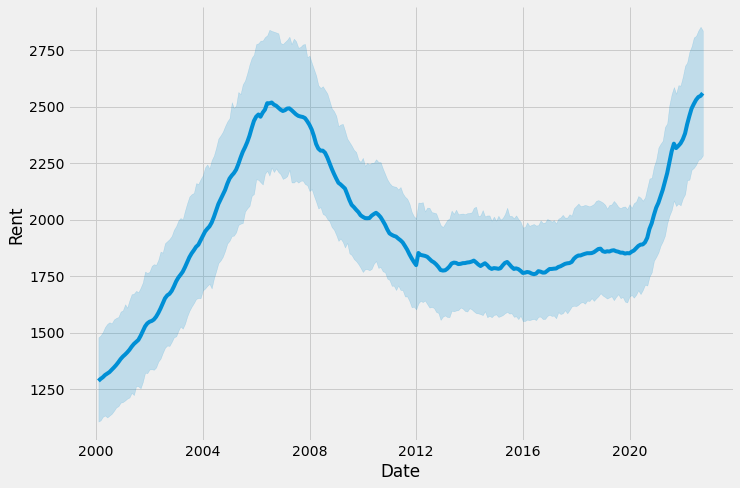

In [23]:
sns.relplot(x='Date',y='Rent',data=df4,height=7,aspect=1.5,kind='line')
plt.show()

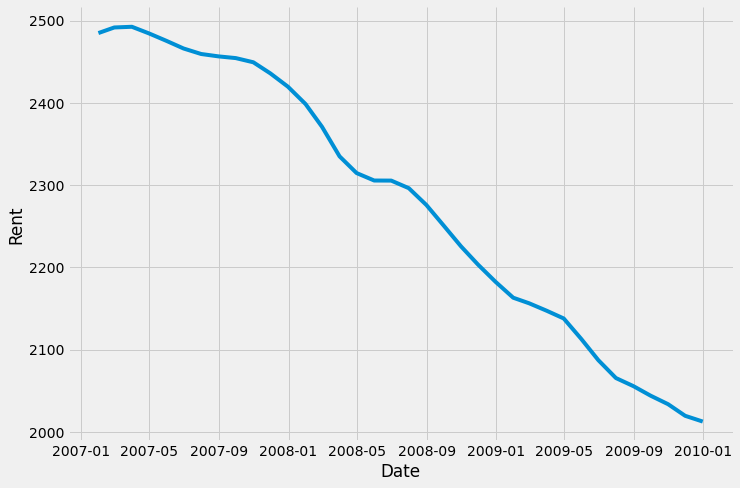

In [24]:
sns.relplot(x=df4[(df4['Year']>=2007) & (df4['Year']<2010) ]['Date'],y='Rent',data=df4,height=7,aspect=1.5,kind='line',ci=None)
plt.show()

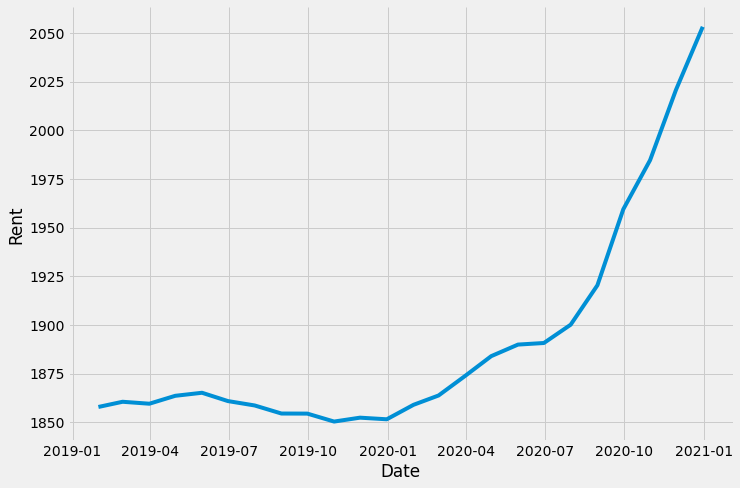

In [25]:
sns.relplot(x=df4[(df4['Year']>=2019) & (df4['Year']<2021) ]['Date'],y='Rent',data=df4,height=7,aspect=1.5,kind='line',ci=None)
plt.show()

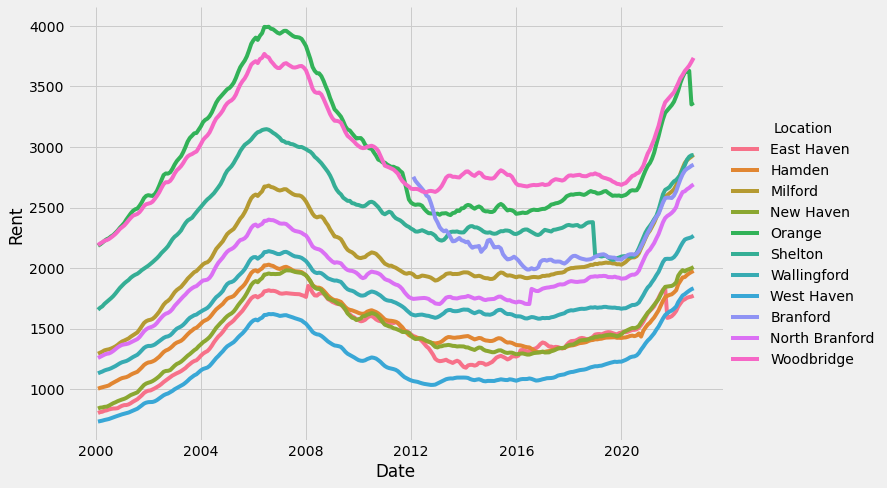

In [26]:
sns.relplot(x='Date',y='Rent',data=df4,height=7,aspect=1.5,kind='line',hue='Location',ci=None)
sns.set_palette(sns.color_palette("tab10"))
plt.show()

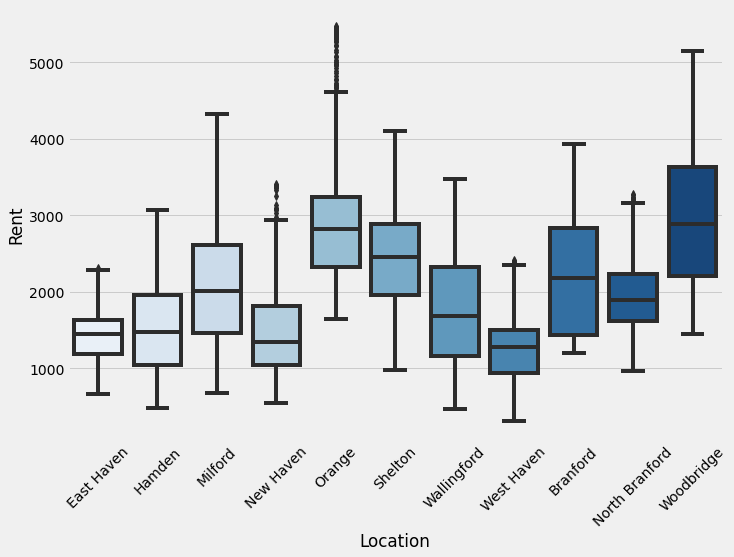

In [27]:
sns.catplot(x='Location',y='Rent',data=df4,kind='box',height=7,palette='Blues',aspect=1.5)
plt.xticks(rotation=45)
plt.show()

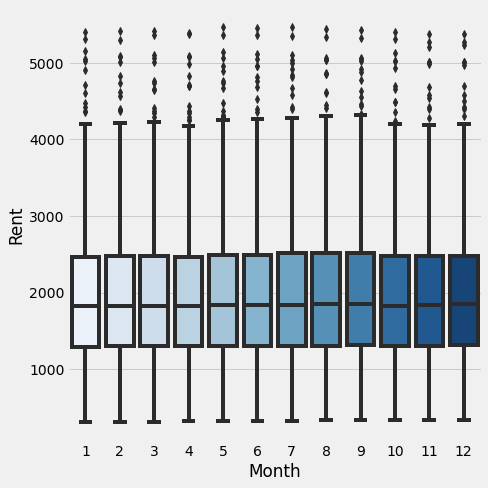

In [28]:
sns.catplot(x='Month',y='Rent',data=df4,kind='box',height=7,palette='Blues')
plt.show()

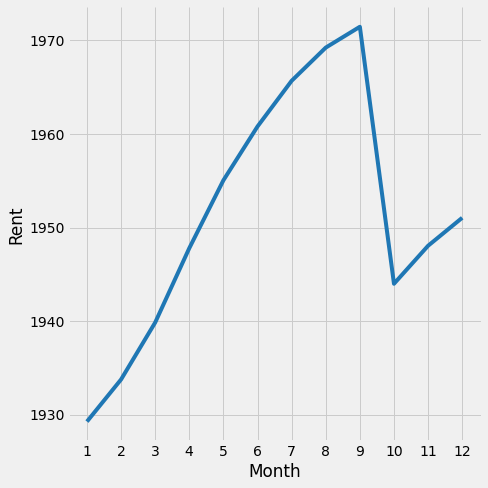

In [29]:
sns.relplot(x='Month',y='Rent',data=df4,kind='line',height=7,palette='Blues',ci=None)
plt.xticks([x for x in range(1,13)])
plt.show()

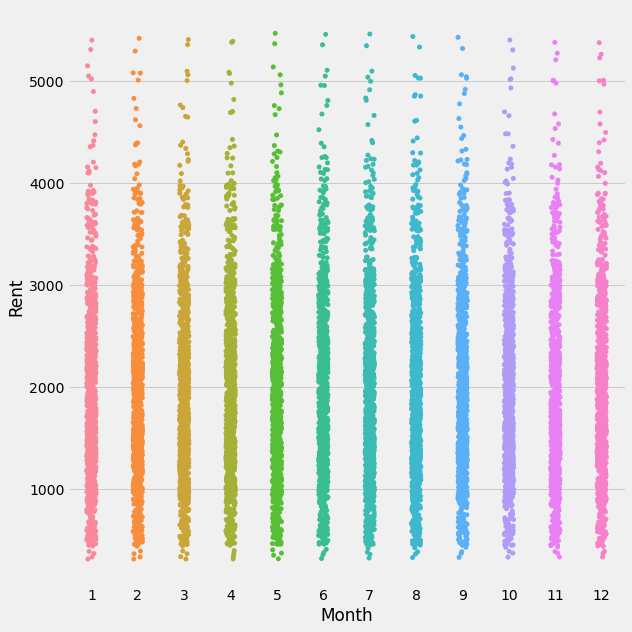

In [30]:
sns.catplot(x='Month',y='Rent',data=df4,kind='strip',height=9)
plt.show()

In [31]:
month_graph=df4.groupby('Month')['Rent'].mean().reset_index()

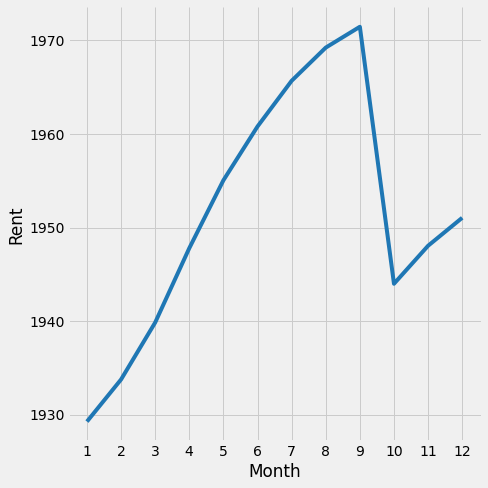

In [32]:
sns.relplot(x='Month',y='Rent',data=month_graph,kind='line',height=7)
plt.xticks([x for x in range(1,13)])
plt.show()

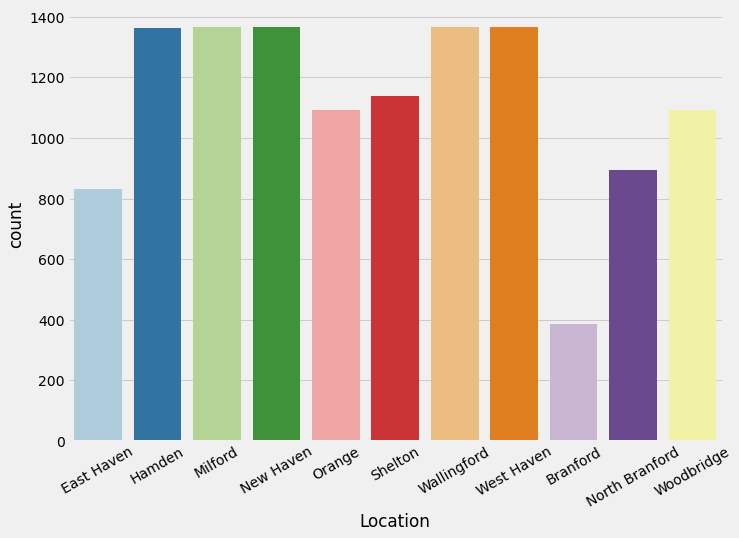

In [33]:
# Plotting count plot for location

sns.set_palette("Paired")
sns.catplot(x='Location',data=df4,kind='count',height=7,aspect=1.5)
plt.xticks(rotation=30)
plt.show()

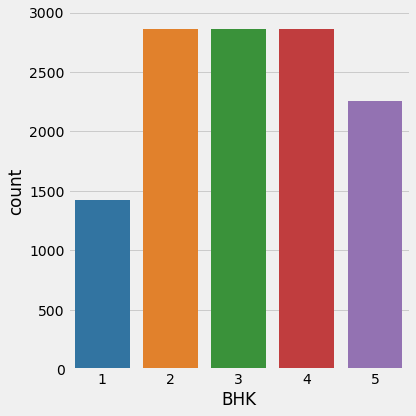

In [34]:
# Plotting count plot for location

sns.set_palette(sns.color_palette("tab10"))
sns.catplot(x='BHK',data=df4,kind='count',height=6)
plt.show()

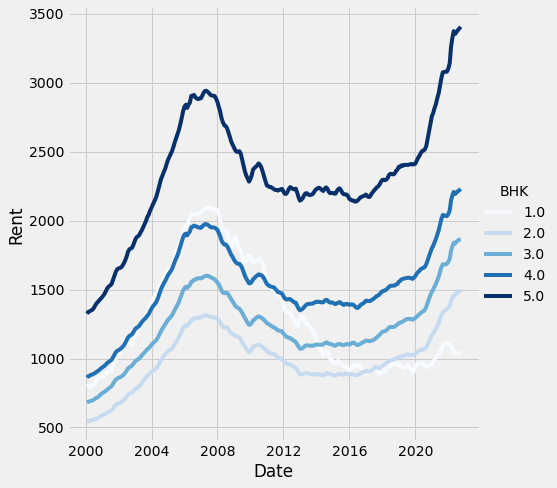

In [35]:
sns.relplot(x='Date',y=df4['Rent'],data=df4[(df4['Location']=='New Haven')],hue='BHK',height=7,kind='line',palette='Blues')
plt.show()

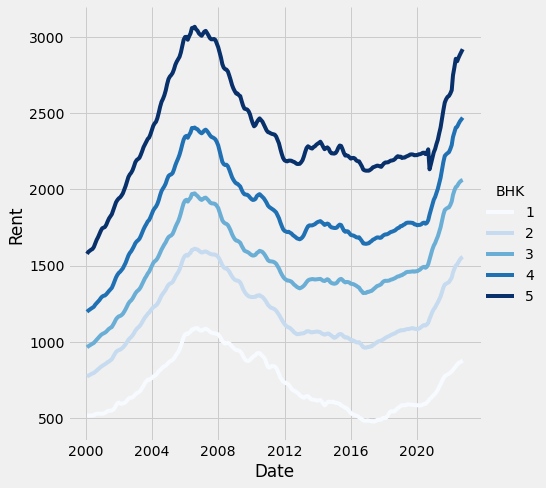

In [36]:
sns.relplot(x='Date',y='Rent',data=df4[(df4['Location']=='Hamden')],hue='BHK',height=7,kind='line',palette='Blues')
plt.show()

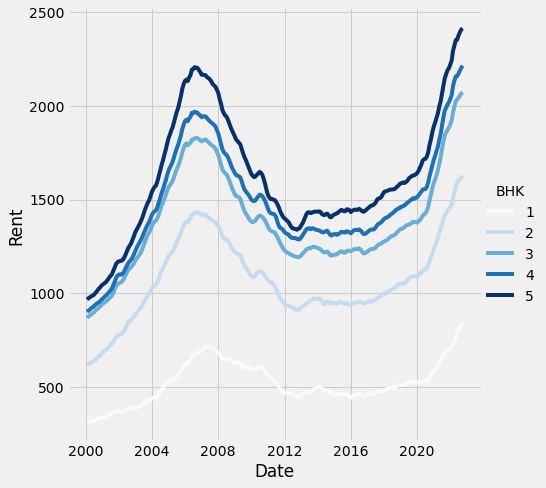

In [37]:
sns.relplot(x='Date',y='Rent',data=df4[(df4['Location']=='West Haven')],hue='BHK',height=7,kind='line',palette='Blues')
plt.show()

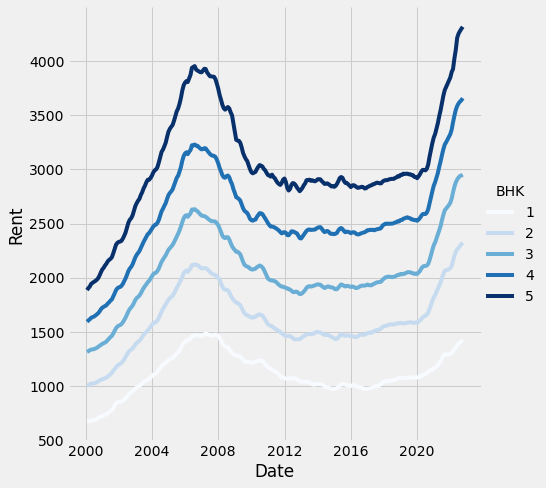

In [38]:
sns.relplot(x='Date',y='Rent',data=df4[(df4['Location']=='Milford')],hue='BHK',height=7,kind='line',palette='Blues')
plt.show()

In [39]:
np.round(df4.pivot_table(index='BHK',columns='Location',values='Rent',aggfunc='mean'))

Location,Branford,East Haven,Hamden,Milford,New Haven,North Branford,Orange,Shelton,Wallingford,West Haven,Woodbridge
BHK,,,,,,,,,,,
1,NaN,924.0,725.0,1116.0,1296.0,NaN,2212.0,1097.0,702.0,521.0,NaN
2,1389.0,1246.0,1186.0,1615.0,1001.0,1465.0,2505.0,1792.0,1236.0,1073.0,2119.0
3,2288.0,1433.0,1513.0,2065.0,1232.0,1891.0,2431.0,2207.0,1726.0,1387.0,2362.0
4,3063.0,1613.0,1857.0,2564.0,1529.0,2290.0,2992.0,2866.0,2310.0,1486.0,3339.0
5,NaN,NaN,2366.0,3049.0,2328.0,2494.0,3772.0,3094.0,2620.0,1619.0,3996.0


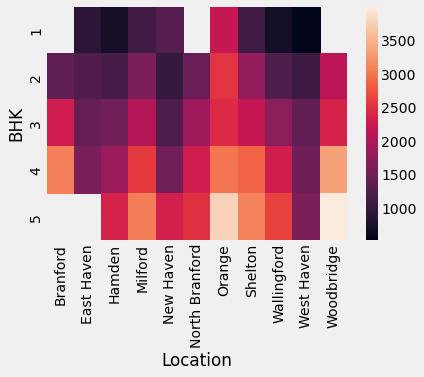

In [40]:
sns.heatmap(np.round(df4.pivot_table(index='BHK',columns='Location',values='Rent',aggfunc='mean'),0))
plt.show()

In [41]:
df4.groupby('Location')['Rent'].describe()

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Branford,387.0,2246.795866,731.846131,1206.0,1431.50,2183.0,2839.00,3936.0
East Haven,832.0,1422.868990,333.062601,668.0,1187.75,1451.0,1632.00,2315.0
Hamden,1364.0,1529.412023,620.383095,477.0,1050.00,1481.0,1964.25,3067.0
Milford,1365.0,2081.679121,773.877986,672.0,1462.00,2011.0,2618.00,4317.0
New Haven,1365.0,1476.884249,564.318393,543.0,1043.00,1348.0,1815.00,3404.0
North Branford,894.0,1933.445190,467.710826,966.0,1616.25,1889.0,2239.00,3281.0
Orange,1094.0,2923.466179,771.764953,1642.0,2325.00,2822.0,3243.50,5472.0
Shelton,1138.0,2433.261863,681.847715,972.0,1954.25,2452.0,2881.00,4104.0
Wallingford,1365.0,1718.750183,747.732339,468.0,1157.00,1684.0,2327.00,3468.0


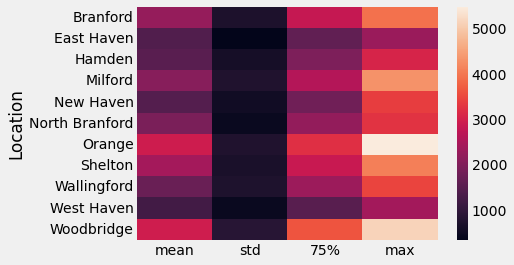

In [42]:
sns.heatmap(df4.groupby('Location')['Rent'].describe()[['mean','std','75%','max']])
plt.show()

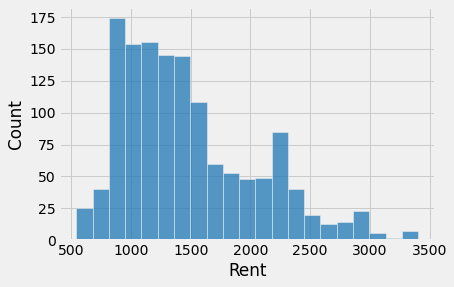

In [43]:
sns.histplot(data=df4[df4['Location']=='New Haven']['Rent'])
plt.show()

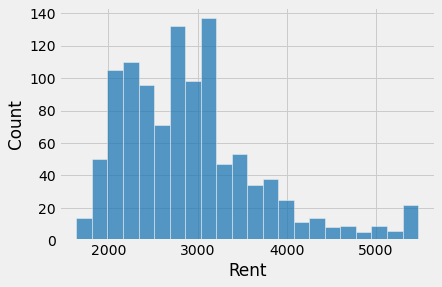

In [44]:
sns.histplot(data=df4[df4['Location']=='Orange']['Rent'])
plt.show()

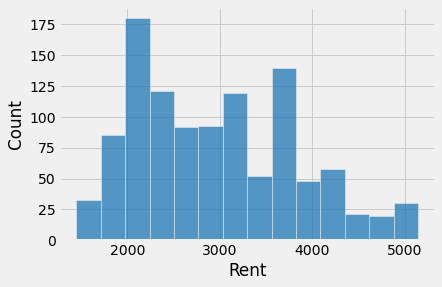

In [45]:
sns.histplot(data=df4[df4['Location']=='Woodbridge']['Rent'])
plt.show()

## Data Modeling

In [46]:
df4.head()

,Date,Location,Rent,t_month,BHK,Year,Month,Month_name
0,2021-09-30,East Haven,856,261,1,2021,9,Sep
1,2021-10-31,East Haven,863,262,1,2021,10,Oct
2,2021-11-30,East Haven,859,263,1,2021,11,Nov
3,2021-12-31,East Haven,858,264,1,2021,12,Dec
4,2022-01-31,East Haven,871,265,1,2022,1,Jan


In [47]:
df5=df4.copy()

In [48]:
df5['t_month2']=df5['t_month']**2
df5['t_month3']=df5['t_month']**3
df5.head()

,Date,Location,Rent,t_month,BHK,Year,Month,Month_name,t_month2,t_month3
0,2021-09-30,East Haven,856,261,1,2021,9,Sep,68121,17779581
1,2021-10-31,East Haven,863,262,1,2021,10,Oct,68644,17984728
2,2021-11-30,East Haven,859,263,1,2021,11,Nov,69169,18191447
3,2021-12-31,East Haven,858,264,1,2021,12,Dec,69696,18399744
4,2022-01-31,East Haven,871,265,1,2022,1,Jan,70225,18609625


In [49]:
df6=df5.copy()
df6.shape

(12261, 10)

In [50]:
dummies_month = pd.get_dummies(df5.Month_name)
dummies_month.head(3)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0


In [51]:
dummies_loc = pd.get_dummies(df5.Location)
dummies_loc.head(3)

,Branford,East Haven,Hamden,Milford,New Haven,North Branford,Orange,Shelton,Wallingford,West Haven,Woodbridge
0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0


In [52]:
df6 = pd.concat([df6,dummies_month.drop('Dec',axis='columns')],axis='columns')
df6 = pd.concat([df6,dummies_loc.drop('Branford',axis='columns')],axis='columns')
print(df6.shape)
df6.head()

(12261, 31)


,Date,Location,Rent,t_month,BHK,Year,Month,Month_name,t_month2,t_month3,...,East Haven,Hamden,Milford,New Haven,North Branford,Orange,Shelton,Wallingford,West Haven,Woodbridge
0,2021-09-30,East Haven,856,261,1,2021,9,Sep,68121,17779581,...,1,0,0,0,0,0,0,0,0,0
1,2021-10-31,East Haven,863,262,1,2021,10,Oct,68644,17984728,...,1,0,0,0,0,0,0,0,0,0
2,2021-11-30,East Haven,859,263,1,2021,11,Nov,69169,18191447,...,1,0,0,0,0,0,0,0,0,0
3,2021-12-31,East Haven,858,264,1,2021,12,Dec,69696,18399744,...,1,0,0,0,0,0,0,0,0,0
4,2022-01-31,East Haven,871,265,1,2022,1,Jan,70225,18609625,...,1,0,0,0,0,0,0,0,0,0


In [53]:
df7=df6.drop(columns=['Location','Month_name','Date','Month'])
df7.shape

(12261, 27)

In [54]:
df7.head()

,Rent,t_month,BHK,Year,t_month2,t_month3,Apr,Aug,Feb,Jan,...,East Haven,Hamden,Milford,New Haven,North Branford,Orange,Shelton,Wallingford,West Haven,Woodbridge
0,856,261,1,2021,68121,17779581,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,863,262,1,2021,68644,17984728,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,859,263,1,2021,69169,18191447,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,858,264,1,2021,69696,18399744,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,871,265,1,2022,70225,18609625,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [55]:
training=df7[df7['Year']<2021]
print(training['Year'].unique())
print(training.shape)
training.head()

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]
(11238, 27)


,Rent,t_month,BHK,Year,t_month2,t_month3,Apr,Aug,Feb,Jan,...,East Haven,Hamden,Milford,New Haven,North Branford,Orange,Shelton,Wallingford,West Haven,Woodbridge
13,516,1,1,2000,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
14,516,2,1,2000,4,8,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
15,517,3,1,2000,9,27,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16,516,4,1,2000,16,64,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
17,518,5,1,2000,25,125,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [56]:
validation=df7[(df7['Year']>=2021)]
print(validation['Year'].unique())
print(validation.shape)
validation.head()

[2021 2022]
(1023, 27)


,Rent,t_month,BHK,Year,t_month2,t_month3,Apr,Aug,Feb,Jan,...,East Haven,Hamden,Milford,New Haven,North Branford,Orange,Shelton,Wallingford,West Haven,Woodbridge
0,856,261,1,2021,68121,17779581,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,863,262,1,2021,68644,17984728,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,859,263,1,2021,69169,18191447,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,858,264,1,2021,69696,18399744,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,871,265,1,2022,70225,18609625,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [57]:
train_plus_valid=df7[(df7['Year']<2019)]
print(train_plus_valid['Year'].unique())
print(train_plus_valid.shape)
train_plus_valid.head()

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]
(10087, 27)


,Rent,t_month,BHK,Year,t_month2,t_month3,Apr,Aug,Feb,Jan,...,East Haven,Hamden,Milford,New Haven,North Branford,Orange,Shelton,Wallingford,West Haven,Woodbridge
13,516,1,1,2000,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
14,516,2,1,2000,4,8,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
15,517,3,1,2000,9,27,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16,516,4,1,2000,16,64,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
17,518,5,1,2000,25,125,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [58]:
forecast=df7[(df7['Year']>=2019)]
print(forecast['Year'].unique())
print(forecast.shape)
forecast.head()

[2021 2022 2019 2020]
(2174, 27)


,Rent,t_month,BHK,Year,t_month2,t_month3,Apr,Aug,Feb,Jan,...,East Haven,Hamden,Milford,New Haven,North Branford,Orange,Shelton,Wallingford,West Haven,Woodbridge
0,856,261,1,2021,68121,17779581,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,863,262,1,2021,68644,17984728,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,859,263,1,2021,69169,18191447,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,858,264,1,2021,69696,18399744,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,871,265,1,2022,70225,18609625,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [59]:
y_train=training['Rent']
x_train=training.drop(columns=['Rent','Year'])

y_valid=validation['Rent']
x_valid=validation.drop(columns=['Rent','Year'])

y_trainplusvalid=train_plus_valid['Rent']
x_trainplusvalid=train_plus_valid.drop(columns=['Rent','Year'])

y_forecast=forecast['Rent']
x_forecast=forecast.drop(columns=['Rent','Year'])

In [60]:
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [61]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X2=sm.add_constant(x_train)
X2

C:\Users\Abhishek\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,t_month,BHK,t_month2,t_month3,Apr,Aug,Feb,Jan,Jul,...,East Haven,Hamden,Milford,New Haven,North Branford,Orange,Shelton,Wallingford,West Haven,Woodbridge
13,1.0,1,1,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
14,1.0,2,1,4,8,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
15,1.0,3,1,9,27,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16,1.0,4,1,16,64,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
17,1.0,5,1,25,125,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12235,1.0,248,4,61504,15252992,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12236,1.0,249,4,62001,15438249,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12237,1.0,250,4,62500,15625000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12238,1.0,251,4,63001,15813251,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
est=sm.OLS(y_train,X2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rent   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     3478.
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:27:47   Log-Likelihood:                -79661.
No. Observations:               11238   AIC:                         1.594e+05
Df Residuals:                   11212   BIC:                         1.596e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            151.9079     22.950      6.

In [63]:
y_pred=mlr.predict(x_valid)
y_pred

array([ 919.81787137,  939.60688202,  961.26472326, ..., 3681.08231857,
       3704.75484903, 3729.80677019])

In [64]:
df=pd.DataFrame({'Actual':y_valid,'Predicted':y_pred})
df.sort_index()

,Actual,Predicted
0,856,919.817871
1,863,939.606882
2,859,961.264723
3,858,982.659745
4,871,1019.797386
...,...,...
12256,4070,3633.329942
12257,4097,3657.499657
12258,4131,3681.082319
12259,4179,3704.754849


In [65]:
r2=r2_score(y_valid,y_pred)
MAE=mean_absolute_error(y_valid,y_pred)
RMSE=np.sqrt(mean_squared_error(y_valid,y_pred))

In [66]:
print(r2, MAE, RMSE)

0.8940708263413213 237.2854390115934 308.3867737720131


In [80]:
def predict_price(location,t_month,bhk,t_month2,t_month3,month): 
    try:
        loc_index_1 = np.where(x_train.columns==location)[0][0]
        loc_index_2 = np.where(x_train.columns==month)[0][0]
    except:
        loc_index_1=-1
        loc_index_2=-1
    x = np.zeros(len(x_train.columns))
    x[0] = t_month
    x[1] = bhk
    x[2]=t_month2
    x[3]=t_month3
    if loc_index_1 >= 0:
        x[loc_index_1] = 1
    if loc_index_2 >= 0:
        x[loc_index_2] = 1
    print(x)

    return mlr.predict([x])[0]

In [68]:
predict_price('East Haven',236,4,236**2,236**3,'Aug')

[2.3600000e+02 4.0000000e+00 5.5696000e+04 1.3144256e+07 0.0000000e+00
 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


1729.7349354926198

In [69]:
predict_price('East Haven',237,4,237**2,237**3,'Aug')

[2.3700000e+02 4.0000000e+00 5.6169000e+04 1.3312053e+07 0.0000000e+00
 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


1740.298253221689

In [70]:
predict_price('East Haven',238,4,238**2,238**3,'Aug')

[2.3800000e+02 4.0000000e+00 5.6644000e+04 1.3481272e+07 0.0000000e+00
 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


1751.2470843471208

In [83]:
predict_price('Branford',253,3,253**2,253**3,'Jan')

[2.5300000e+02 3.0000000e+00 6.4009000e+04 1.6194277e+07 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


2450.055637703649

In [84]:
predict_price('Branford',252,3,252**2,252**3,'Dec')

[2.5200000e+02 3.0000000e+00 6.3504000e+04 1.6003008e+07 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


2432.8289632735914

In [79]:
np.where(x_train.columns=='East Haven')[0][0]

array([15], dtype=int64)

In [71]:
import pickle
with open('ct_home_prices_model.pickle','wb') as f:
    pickle.dump(mlr,f)

In [72]:
import json
columns = {
    'data_columns' : [col.lower() for col in x_train.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))